<a href="https://colab.research.google.com/github/dinans2003d/Datathon2024/blob/main/dinan's_datathon_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries for data manipulation and analysis
import pandas as pd  # Data manipulation and analysis
import numpy as np   # Numerical computations

# Importing libraries for data visualization
import matplotlib.pyplot as plt  # Visualization
import seaborn as sns            # Advanced visualization
import

# Importing libraries for machine learning and statistical modeling
from sklearn.model_selection import train_test_split  # Data splitting
from sklearn.preprocessing import StandardScaler      # Data scaling
from sklearn.linear_model import LogisticRegression   # Logistic regression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Evaluation metrics

# Miscellaneous
import os  # Operating system interaction
import sys # System-specific parameters and functions
import warnings  # To manage warnings
warnings.filterwarnings('ignore')  # Suppress warnings

In [ ]:
# Grant permission to access Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

!ls -l ./gdrive/MyDrive/Colab\ Notebooks/Datasets

Mounted at /content/gdrive
total 23995
-rw------- 1 root root 24570411 Nov 22 17:48 flights.csv


In [ ]:
# Read dataset
# Replace 'dataset.csv' with actual name of the csv file
import pandas as pd

df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Datasets/flights.csv', low_memory=False)
df.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   travelCode  271888 non-null  int64  
 1   userCode    271888 non-null  int64  
 2   from        271888 non-null  object 
 3   to          271888 non-null  object 
 4   flightType  271888 non-null  object 
 5   price       271888 non-null  float64
 6   time        271888 non-null  float64
 7   distance    271888 non-null  float64
 8   agency      271888 non-null  object 
 9   date        271888 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 20.7+ MB


In [ ]:
#using the data, how can we offer the best travel experience, what can we be

In [ ]:
df['dollars_per_100_km'] = (df['price'] / df['distance']) * 100

In [ ]:
df.head(5)

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date,dollars_per_100_km
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019,212.020162
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019,191.017398
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019,233.314512
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019,176.824142
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019,202.687577


In [ ]:
#drop the travelcode and the usercode
df = df.drop(['travelCode', 'userCode'], axis=1)

In [ ]:
df.head(5)

,from,to,flightType,price,time,distance,agency,date,dollars_per_100_km
0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019,212.020162
1,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019,191.017398
2,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019,233.314512
3,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019,176.824142
4,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019,202.687577


In [ ]:
# Ensure 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Verify if there are any non-convertible values
if df['date'].isnull().any():
    print("Some dates could not be converted. Please check the dataset for invalid date values.")

# Categorize seasons based on the month
df['season'] = pd.cut(
    df['date'].dt.month,
    bins=[0, 3, 6, 9, 12],
    labels=['Winter', 'Spring', 'Summer', 'Fall'],
    right=False
)

# Display the updated DataFrame
print(df.head())

   travelCode  userCode                from                  to  flightType  \
0           0         0         Recife (PE)  Florianopolis (SC)  firstClass   
1           0         0  Florianopolis (SC)         Recife (PE)  firstClass   
2           1         0       Brasilia (DF)  Florianopolis (SC)  firstClass   
3           1         0  Florianopolis (SC)       Brasilia (DF)  firstClass   
4           2         0        Aracaju (SE)       Salvador (BH)  firstClass   

     price  time  distance       agency       date  dollars_per_100_km season  
0  1434.38  1.76    676.53  FlyingDrops 2019-09-26          212.020162   Fall  
1  1292.29  1.76    676.53  FlyingDrops 2019-09-30          191.017398   Fall  
2  1487.52  1.66    637.56      CloudFy 2019-10-03          233.314512   Fall  
3  1127.36  1.66    637.56      CloudFy 2019-10-04          176.824142   Fall  
4  1684.05  2.16    830.86      CloudFy 2019-10-10          202.687577   Fall  


In [ ]:
df.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date,dollars_per_100_km,season
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,2019-09-26,212.020162,Fall
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,2019-09-30,191.017398,Fall
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,2019-10-03,233.314512,Fall
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,2019-10-04,176.824142,Fall
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,2019-10-10,202.687577,Fall


In [ ]:
#determine the data type for data column
print(df['date'].dtype)

datetime64[ns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   travelCode          271888 non-null  int64         
 1   userCode            271888 non-null  int64         
 2   from                271888 non-null  object        
 3   to                  271888 non-null  object        
 4   flightType          271888 non-null  object        
 5   price               271888 non-null  float64       
 6   time                271888 non-null  float64       
 7   distance            271888 non-null  float64       
 8   agency              271888 non-null  object        
 9   date                271888 non-null  datetime64[ns]
 10  dollars_per_100_km  271888 non-null  float64       
 11  season              245542 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 23.1+

In [ ]:
display

In [ ]:
import pandas as pd

# Ensure 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Create a 'season' column using month bins
df['season'] = pd.cut(
    df['date'].dt.month,
    bins=[0, 3, 6, 9, 12],
    labels=['Winter', 'Spring', 'Summer', 'Fall'],
    right=False
)

# Filter rows where the month is December
december_data = df[df['date'].dt.month == 12]

# Select only the 'date' and 'season' columns
december_columns = december_data[['date', 'season']]

# Display the result
print(december_columns)

             date season
20     2019-12-05    NaN
21     2019-12-06    NaN
22     2019-12-12    NaN
23     2019-12-16    NaN
24     2019-12-19    NaN
...           ...    ...
271823 2019-12-13    NaN
271824 2019-12-19    NaN
271825 2019-12-23    NaN
271826 2019-12-26    NaN
271827 2019-12-27    NaN

[26346 rows x 2 columns]


In [ ]:
# Ensure 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Create a 'season' column with proper bins to include December in 'Winter'
df['season'] = pd.cut(
    df['date'].dt.month,
    bins=[0, 3, 6, 9, 12],
    labels=['Winter', 'Spring', 'Summer', 'Fall'],
    right=False
)

# Adjust December to be part of 'Winter'
df.loc[df['date'].dt.month == 12, 'season'] = 'Winter'

# Filter rows where the month is December
december_data = df[df['date'].dt.month == 12]

# Select only the 'date' and 'season' columns
december_columns = december_data[['date', 'season']]

# Display the result
print(december_columns)

             date  season
20     2019-12-05  Winter
21     2019-12-06  Winter
22     2019-12-12  Winter
23     2019-12-16  Winter
24     2019-12-19  Winter
...           ...     ...
271823 2019-12-13  Winter
271824 2019-12-19  Winter
271825 2019-12-23  Winter
271826 2019-12-26  Winter
271827 2019-12-27  Winter

[26346 rows x 2 columns]


In [ ]:
df.head(10)

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date,dollars_per_100_km,season
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,2019-09-26,212.020162,Fall
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,2019-09-30,191.017398,Fall
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,2019-10-03,233.314512,Fall
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,2019-10-04,176.824142,Fall
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,2019-10-10,202.687577,Fall
5,2,0,Salvador (BH),Aracaju (SE),firstClass,1531.92,2.16,830.86,CloudFy,2019-10-12,184.377633,Fall
6,3,0,Aracaju (SE),Campo Grande (MS),economic,743.54,1.69,650.10,Rainbow,2019-10-17,114.373173,Fall
7,3,0,Campo Grande (MS),Aracaju (SE),economic,877.56,1.69,650.10,Rainbow,2019-10-20,134.988463,Fall
8,4,0,Recife (PE),Florianopolis (SC),economic,803.39,1.76,676.53,Rainbow,2019-10-24,118.751571,Fall
9,4,0,Florianopolis (SC),Recife (PE),economic,695.30,1.76,676.53,Rainbow,2019-10-26,102.774452,Fall


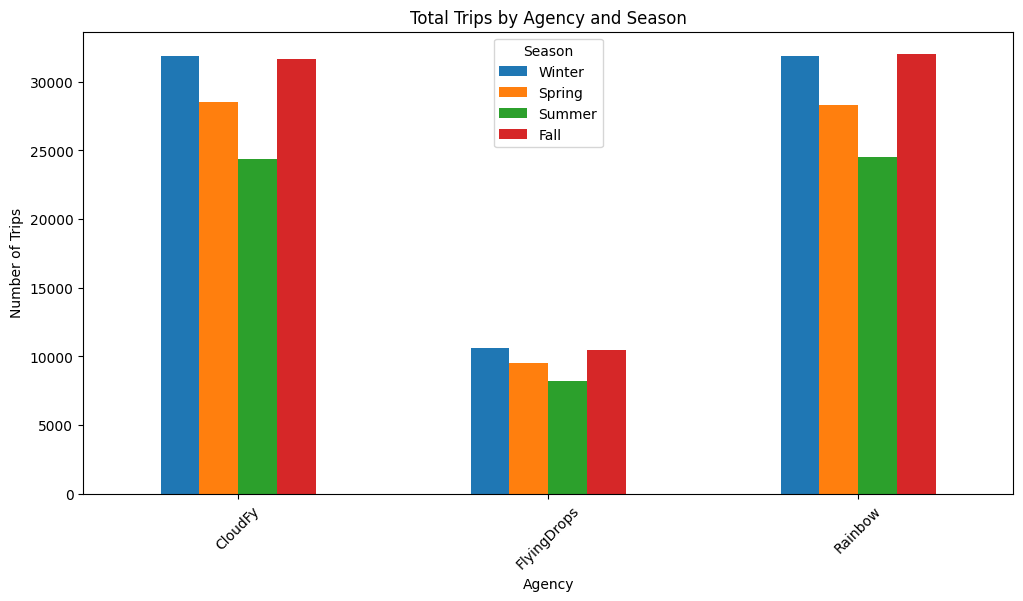

In [ ]:
# Group by agency and season, then count trips
agency_season_trips = df.groupby(['agency', 'season']).size().unstack(fill_value=0)

# Plot bar chart
agency_season_trips.plot(kind='bar', figsize=(12, 6))
plt.title('Total Trips by Agency and Season')
plt.xlabel('Agency')
plt.ylabel('Number of Trips')
plt.legend(title='Season')
plt.xticks(rotation=45)
plt.show()

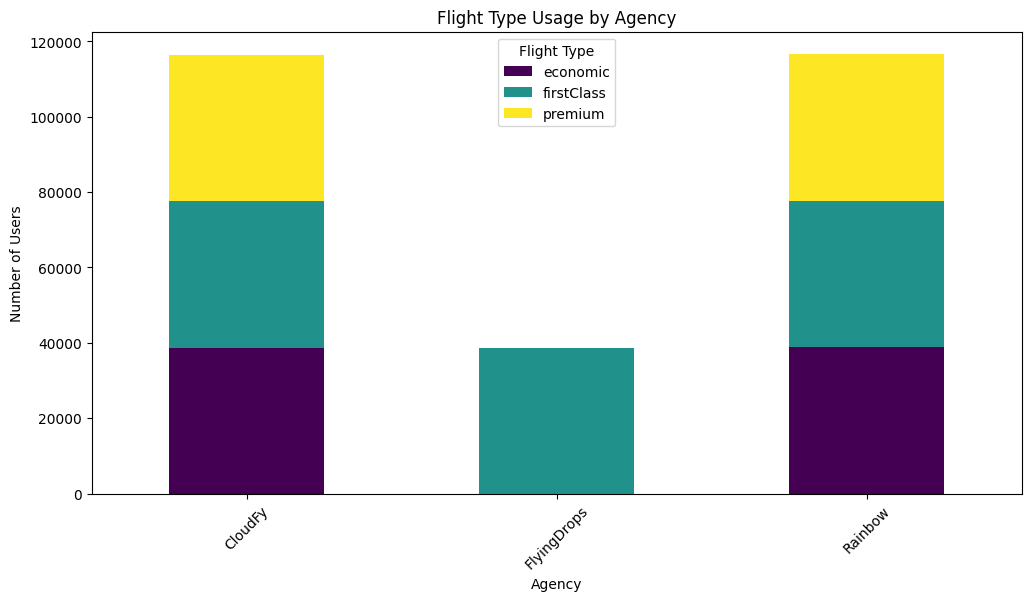

In [ ]:
# Group by agency and flightType to count the number of users for each type
flight_type_by_agency = df.groupby(['agency', 'flightType']).size().unstack(fill_value=0)

# Plot the data as a stacked bar chart
flight_type_by_agency.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Flight Type Usage by Agency')
plt.xlabel('Agency')
plt.ylabel('Number of Users')
plt.legend(title='Flight Type')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.head(10)

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date,dollars_per_100_km,season
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,2019-09-26,212.020162,Fall
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,2019-09-30,191.017398,Fall
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,2019-10-03,233.314512,Fall
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,2019-10-04,176.824142,Fall
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,2019-10-10,202.687577,Fall
5,2,0,Salvador (BH),Aracaju (SE),firstClass,1531.92,2.16,830.86,CloudFy,2019-10-12,184.377633,Fall
6,3,0,Aracaju (SE),Campo Grande (MS),economic,743.54,1.69,650.10,Rainbow,2019-10-17,114.373173,Fall
7,3,0,Campo Grande (MS),Aracaju (SE),economic,877.56,1.69,650.10,Rainbow,2019-10-20,134.988463,Fall
8,4,0,Recife (PE),Florianopolis (SC),economic,803.39,1.76,676.53,Rainbow,2019-10-24,118.751571,Fall
9,4,0,Florianopolis (SC),Recife (PE),economic,695.30,1.76,676.53,Rainbow,2019-10-26,102.774452,Fall


In [ ]:
df['season'].count()

271888

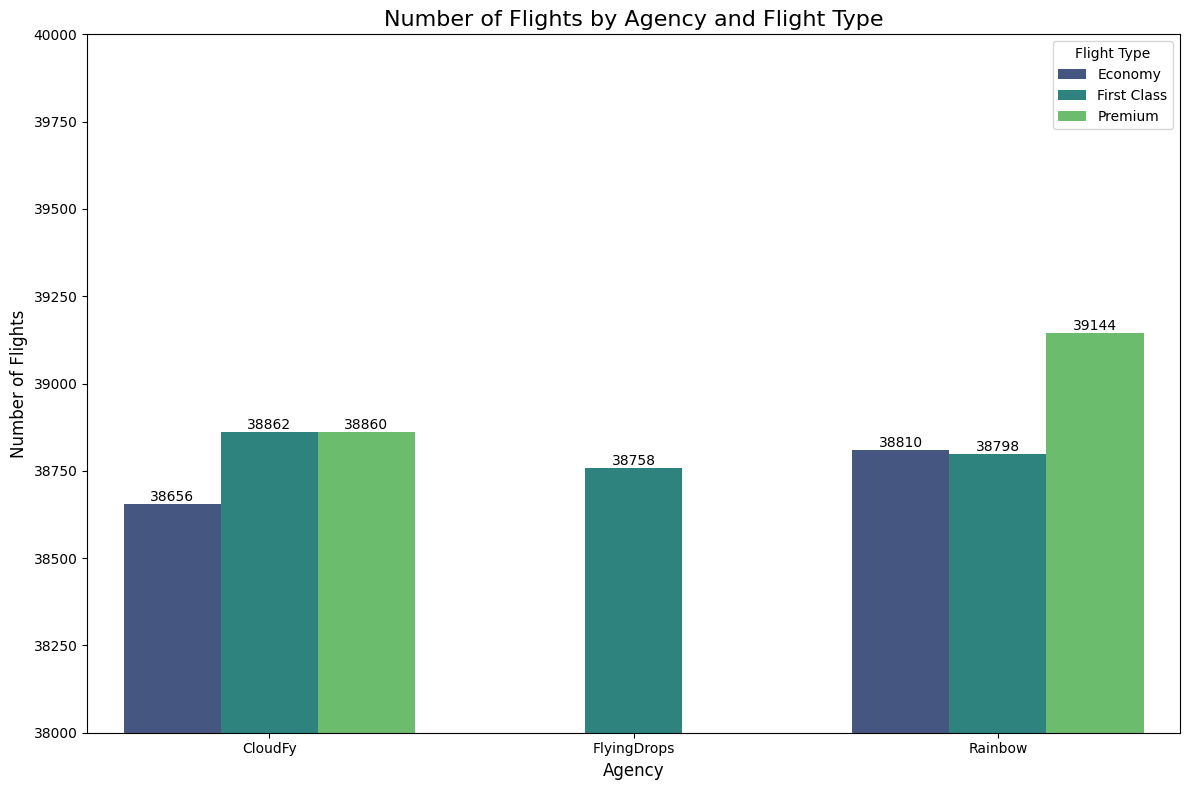

In [ ]:
# Group data by agency and flightType, calculating the number of flights
agency_flight_count = df.groupby(['agency', 'flightType']).size().reset_index(name='number_of_flights')

# Rename flightType for proper labeling
flight_type_labels = {'economic': 'Economy', 'premium': 'Premium', 'firstClass': 'First Class'}
agency_flight_count['flightType'] = agency_flight_count['flightType'].map(flight_type_labels)

# Create a bar chart using the number of flights with y-axis limited to 30,000 - 40,000
plt.figure(figsize=(12, 8))
barplot = sns.barplot(
    data=agency_flight_count,
    x='agency',
    y='number_of_flights',
    hue='flightType',
    palette='viridis'
)

# Add labels on each bar
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.0f', label_type='edge', fontsize=10, color='black')

# Add title and axis labels
plt.title('Number of Flights by Agency and Flight Type', fontsize=16)
plt.xlabel('Agency', fontsize=12)
plt.ylabel('Number of Flights', fontsize=12)
plt.legend(title='Flight Type')
plt.xticks(rotation=0)
plt.ylim(38000, 40000)  # Set the y-axis range

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
#based all flights, range between 38,000 and 40,000 -> we can see from th

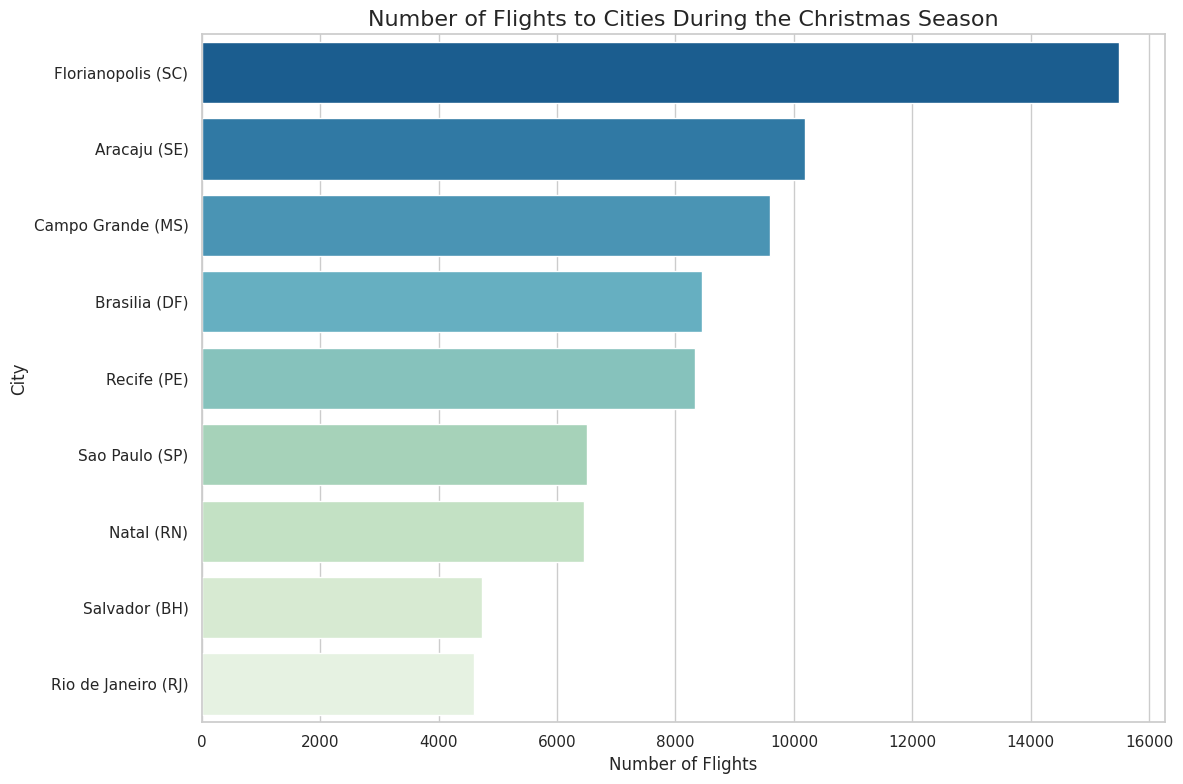

In [ ]:
# Create a bar chart for Christmas season travel with blue-green color palette
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")  # Set a clean theme
sns.barplot(
    data=christmas_city_travel,
    x='number_of_flights',
    y='to',
    palette='GnBu_r' #blue-green gradient palette
)

# Add labels and title
plt.title('Number of Flights to Cities During the Christmas Season', fontsize=16)
plt.xlabel('Number of Flights', fontsize=12)
plt.ylabel('City', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

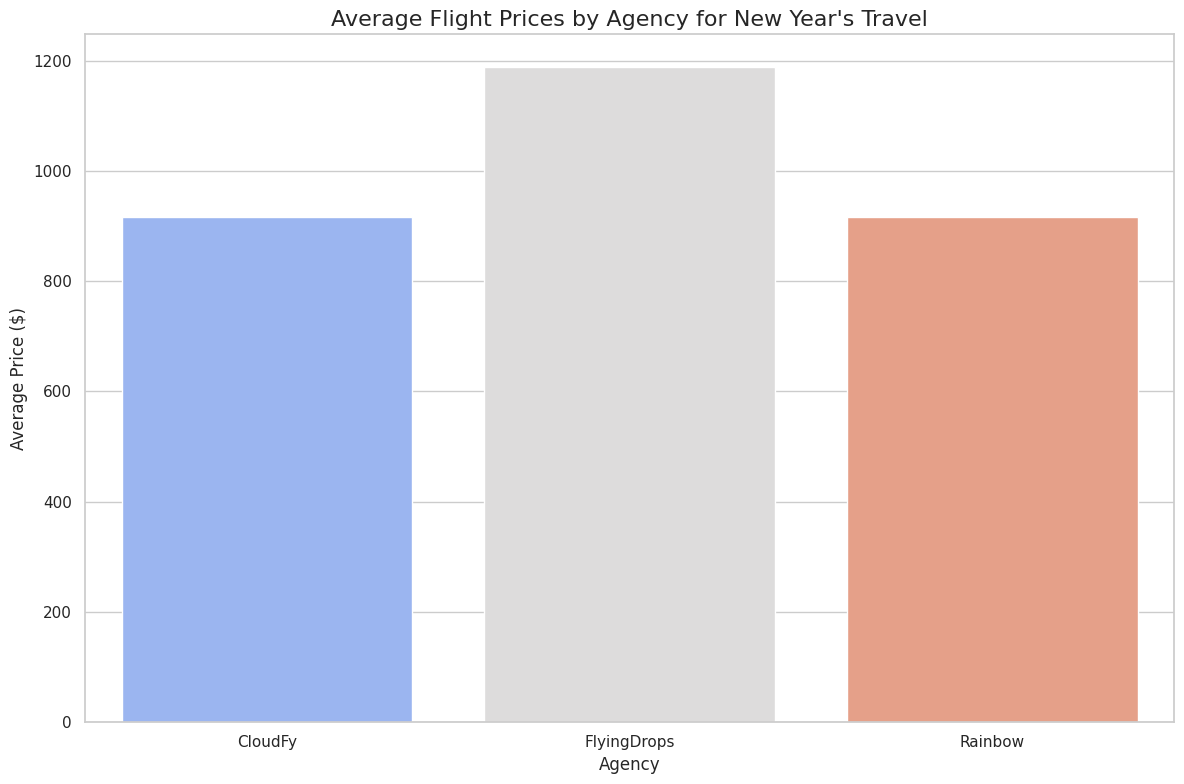

In [ ]:
# Filter the dataset for New Year's period (assuming it's part of Winter season in January)
new_years_travel = df[df['season'] == 'Winter']  # Assuming New Year's is in the Winter season

# Group by agency and calculate average price for flights
new_years_prices = new_years_travel.groupby('agency')['price'].mean().reset_index()

# Create a bar chart to visualize average prices per agency for New Year's travel
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")
sns.barplot(
    data=new_years_prices,
    x='agency',
    y='price',
    palette='coolwarm'  # Use a distinct color gradient
)

# Add title and labels
plt.title('Average Flight Prices by Agency for New Year\'s Travel', fontsize=16)
plt.xlabel('Agency', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()
